### 상관분석

1. 두 수치형 데이터 간의 직선적 관계를 알려줌 > 직선성 외에는 알려주는 것이 없다.  
 상관관계는 항상 변수2개에 대한 분석만 수행함 > 2개씩 여러 번의 분석을 수행,  
 또, **수치형 데이터 사용**만 가능함 (카이제곱검정 : 범주형 데이터)  

2. 직선적 관계, 음.양의 관계와는 단순히 관계가 있다는 것 > ***인과관계를 얘기하는 것이 아니다.***  
3. 상관계수가 데이터 안에 존재하는 진짜 상관성과 일치하지 않는 경우가 종종 있다.  
직선성이 아닌 것, 몇 개의 그룹으로 나눠진 경우, 이상값이 일부 극단적으로 존재하는 경우 > 상관분석에 전적으로 기대는 것은 바람직하지 않음

Q. 구별의 인구와 구별 자전거 대여건수는 관계가 있을까?

In [1]:
import pandas as pd

bike_data2 = pd.read_csv('bike_data2.csv')

In [2]:
dist_by_gu = pd.pivot_table(bike_data2, index = 'Gu', values = 'Distance', aggfunc = len)
dist_by_gu

,Distance
Gu,
동대문구,4797
마포구,9345
서초구,6543
영등포구,10290
은평구,4606


Distance 컬럼 : pivot table의 요건을 갖추기 위해 사용한 것임

len : 집계함수, 해당 구 별로 데이터의 개수를 파악

In [4]:
population = pd.read_csv('population_by_Gu.txt', sep = '\t')
population

,Gu,Family,Population,Male,Female,D_Total,D_Male,D_Female,F_Total,F_Male,F_Female,per_Family,over_65
0,동대문구,164191,363023,178490,184533,346194,172113,174081,16829,6377,10452,2.11,59350
1,은평구,207681,484546,233360,251186,480032,231528,248504,4514,1832,2682,2.31,80738
2,마포구,175023,385925,181303,204622,374035,176891,197144,11890,4412,7478,2.14,52429
3,영등포구,174806,400986,200986,200000,367678,182438,185240,33308,18548,14760,2.10,57872
4,서초구,173199,435107,208181,226926,430826,206039,224787,4281,2142,2139,2.49,57136


In [5]:
by_gu = pd.merge(dist_by_gu, population, on = 'Gu')
by_gu

,Gu,Distance,Family,Population,Male,Female,D_Total,D_Male,D_Female,F_Total,F_Male,F_Female,per_Family,over_65
0,동대문구,4797,164191,363023,178490,184533,346194,172113,174081,16829,6377,10452,2.11,59350
1,마포구,9345,175023,385925,181303,204622,374035,176891,197144,11890,4412,7478,2.14,52429
2,서초구,6543,173199,435107,208181,226926,430826,206039,224787,4281,2142,2139,2.49,57136
3,영등포구,10290,174806,400986,200986,200000,367678,182438,185240,33308,18548,14760,2.10,57872
4,은평구,4606,207681,484546,233360,251186,480032,231528,248504,4514,1832,2682,2.31,80738


### 산점도 : 구별 총 대여건수와 인구수 간의 상관관계를 알아보기 위함

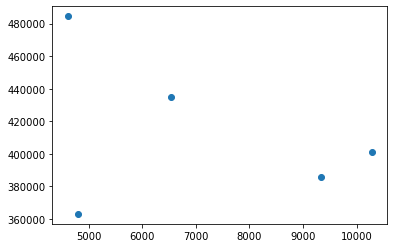

In [7]:
import matplotlib.pyplot as plt

plt.scatter(by_gu.Distance, by_gu.Population)
plt.show()

### 상관계수를 구하는 함수

1. scipy.stats가 제공하는 pearsonr함수  
2. pandas의 corr()함수

In [8]:
from scipy import stats

stats.pearsonr(by_gu.Distance, by_gu.Population)

(-0.35477444022652943, 0.557950425295368)

첫번째 값 : 상관계수, 두번째 값 : p-value

### 상관계수의 의미

-1부터 1의 값을 갖고 절대값이 클수록 강한 상관관계가 있다.

---

상관분석의 귀무가설 : 두 변수 간 상관관계가 없다.

In [9]:
by_gu = pd.merge(dist_by_gu, population, on = 'Gu')[['Gu', 'Distance', 'Population']]
by_gu.corr()

,Distance,Population
Distance,1.000000,-0.354774
Population,-0.354774,1.000000


corr()의 장점  
데이터가 가지고 있는 모든 컬럼을 대상으로 상관계수를 구해서 보여줌 > 많은 수치형 데이터 컬럼을 모두 상관분석 해보고자 할 때 간편함